In [24]:
import pandas as pd
import gzip
with open('/Users/huizhihan/Desktop/bitcoin-tweet-compressed.csv','rb') as fd:
    gzip_fd=gzip.GzipFile(fileobj=fd)
    data=pd.read_csv(gzip_fd)

In [25]:
data

,tweet,likes_count,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,"What can blockchain be used for, other than Bi...",122.0,-0.408786,-0.299746,-0.274396,-0.896425,0.305179,0.693353,-0.376396,-0.326213,...,-0.098503,0.074016,-0.067437,0.213707,0.370512,-0.391001,0.103542,-0.402592,-0.256571,-0.264312
1,With over 14 Lamassu ATMs in Canada (and many ...,48.0,0.483869,1.065645,-0.311114,-0.787553,0.445068,1.076518,-0.360372,-1.453081,...,-0.597440,0.506139,0.408480,0.155596,0.585628,0.380544,1.598749,-0.075767,-0.350417,0.661146
2,In honor of hitting 10k Facebook likes and 4k ...,41.0,0.447367,0.902123,-0.301179,-0.488731,0.584803,0.914766,-0.546479,-1.572302,...,-0.225541,0.426648,-0.162320,0.179863,0.733328,-0.143373,1.099162,-0.738323,-0.595500,0.817225
3,Great infographic on the state of blockchain t...,24.0,0.486358,1.142295,-0.449053,-0.799823,0.401442,1.456152,-0.246634,-1.243463,...,-0.530973,0.355574,-0.271775,0.484541,0.297668,0.512570,1.397700,0.161051,-0.130877,0.628132
4,Bonus Bitcoin. Free bitcoin faucet. Claim up t...,21.0,0.351523,0.518424,-0.504003,-0.707776,0.439384,0.979097,-0.549929,-1.370536,...,-0.223296,0.510977,-0.226807,0.104097,0.464859,-0.311548,0.813186,-1.034325,-0.725809,0.605031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245371,Dominance 60 aşağısını kendine hedef yaptı.Alt...,690.0,-0.205804,-0.195129,-0.253204,-0.496071,0.601328,-0.361853,-0.324544,-0.167222,...,0.052914,0.421504,-0.129593,0.240013,0.088663,-0.521400,0.844766,-1.041800,-0.261085,-0.593500
245372,Goldman Sachs is looking to offer a “full spec...,661.0,0.302455,0.641557,-0.314325,-0.392596,0.366734,1.547049,-0.397878,-1.607532,...,-0.503538,0.339803,0.252727,0.337439,0.731341,-0.031220,1.308085,-0.573257,-0.471988,0.496739
245373,Thinking about life before Bitcoin is weird.,660.0,-0.256060,-0.324441,-0.123282,-0.641951,0.971198,0.168276,0.127153,-0.154812,...,0.231576,0.378050,-0.360988,-0.106116,-0.297050,-0.150453,0.314749,-0.458841,-0.306791,-0.359254
245374,Taramaları hazırlarken; Kimler bizimle yürüy...,658.0,-0.356781,-0.358095,-0.438649,-0.342050,0.533361,-0.076772,-0.378275,-0.072374,...,0.154856,0.518827,-0.285169,0.095375,0.158406,-0.226306,0.622981,-1.431300,-0.375154,-0.273452


In [26]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [27]:
data=data.drop(['likes_count'], axis=1)

In [28]:
data=data.set_index('tweet')

In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
"What can blockchain be used for, other than Bitcoin? technology",-0.408786,-0.299746,-0.274396,-0.896425,0.305179,0.693353,-0.376396,-0.326213,0.156933,-0.179327,...,-0.098503,0.074016,-0.067437,0.213707,0.370512,-0.391001,0.103542,-0.402592,-0.256571,-0.264312
"With over 14 Lamassu ATMs in Canada (and many more coming in 2016), we are very interested in adding DASH bitcoin",0.483869,1.065645,-0.311114,-0.787553,0.445068,1.076518,-0.360372,-1.453081,1.060813,-0.555730,...,-0.597440,0.506139,0.408480,0.155596,0.585628,0.380544,1.598749,-0.075767,-0.350417,0.661146
"In honor of hitting 10k Facebook likes and 4k Twitter followers, has 5min claims! FreeBitcoin Bitcoin",0.447367,0.902123,-0.301179,-0.488731,0.584803,0.914766,-0.546479,-1.572302,1.055990,-0.298579,...,-0.225541,0.426648,-0.162320,0.179863,0.733328,-0.143373,1.099162,-0.738323,-0.595500,0.817225
Great infographic on the state of blockchain technology. Bitcoin FinTech,0.486358,1.142295,-0.449053,-0.799823,0.401442,1.456152,-0.246634,-1.243463,1.096385,-0.157627,...,-0.530973,0.355574,-0.271775,0.484541,0.297668,0.512570,1.397700,0.161051,-0.130877,0.628132
Bonus Bitcoin. Free bitcoin faucet. Claim up to 5000 satoshi every 15 minutes. bitcoin faucet via,0.351523,0.518424,-0.504003,-0.707776,0.439384,0.979097,-0.549929,-1.370536,0.938906,-0.376633,...,-0.223296,0.510977,-0.226807,0.104097,0.464859,-0.311548,0.813186,-1.034325,-0.725809,0.605031


In [30]:
data_50=data.sample(50)

In [31]:
data_50

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
"Stop twisting stories like that. It's not going to help Bitcoin. He said the tech behind Bitcoin was brilliant (blockchain), but it is way too energy intensive (wasteful). Apperantly, he's not aware of $XRP yet.",-0.182384,-0.245320,-0.006157,-0.629867,0.584033,-0.043222,0.193889,-0.204361,0.320052,0.075735,...,0.016545,-0.142710,0.017922,0.130797,0.106657,-0.040467,-0.036104,-0.062228,0.117869,-0.457481
Byteball now traded on bitsquare.io bitsquare.io bitcoin dag innovation,0.365673,0.202702,-0.231117,-0.644577,-0.014774,0.649974,-0.373173,-0.943101,0.457877,-0.701764,...,-0.306606,0.505753,0.120916,0.639779,0.461023,-0.248836,1.436187,-1.076070,-0.379450,0.209048
". has announced the incorporation of Planaria Corp, his Bitcoin development business",0.676836,0.647348,-0.131352,-0.209121,-0.154241,1.427627,-0.518274,-1.396299,0.124085,-0.694730,...,-0.522944,0.250235,0.285347,0.291864,0.273105,-0.375698,0.649467,-1.134319,-0.481337,0.182812
Don't forget to join the official TV-TWO Telegram group: // tvrevolution crypto cryptocurrencies bitcoin ethereum blockchain fintech ico TVTWO $TTV $crypto,0.167073,0.398648,-0.231797,-0.688031,0.688092,0.852001,-0.425398,-1.580576,0.511292,-0.631065,...,-0.271268,0.318389,0.059916,0.425415,1.041759,-0.247074,1.009007,-0.762721,-0.546992,0.676401
"Toplam 2500 TL Hediye! Şanslı 10 takipçimize 250 TL değerinde BITCOIN hediye ediyoruz! 🎉 - hesabını takip et, -Bu tweeti retweet et ve 2 arkadaşını etiketle! Kazanan takipçilerimiz 12 Mart Cuma günü 14:00’de açıklanacaktır.",0.026886,-0.040083,-0.545751,-0.169660,0.588017,-0.139995,-0.383845,-0.549324,0.104545,-0.287450,...,-0.110590,0.476491,-0.257858,0.077463,0.315363,-0.323012,0.524256,-1.064353,-0.188274,-0.184696
". recently interviewed President for his podcast where they discuss gold, bitcoin, real estate, public markets, alternatives, having a healthy relationship with money and more! Important legal disclosure:",0.212153,0.152555,-0.219736,-0.603234,0.727988,0.881664,-0.514253,-1.319087,0.850963,-0.401767,...,-0.779404,0.463535,0.252615,0.633368,0.457347,-0.049929,0.923160,-0.353045,-0.425785,0.454103
Formasyon çalışması için destek ve direnç bölgelerini takip edeceğiz. Kırmızı halka 9K$ destek bölgesini ifade eder. Mavi halka 11K direnç bölgesini. Takip edelim. bitcoin,-0.164807,-0.041631,-0.539865,-0.434089,0.360229,-0.092154,-0.392428,-0.196205,-0.100294,-0.258220,...,0.067362,0.540382,0.157443,0.074903,0.046908,-0.662617,0.716173,-1.397794,-0.408551,-0.525920
"the CIO of one of the world's largest asset managers with 7.8 TRILLION of assets under management, just went on TV and told investors bitcoin is a more functional gold 🤯 slowly, and then all at once",0.120341,0.178139,-0.221598,-0.742134,0.913449,0.758497,-0.396579,-1.087566,0.740808,-0.225379,...,-0.497543,0.525413,-0.140383,0.589361,0.358767,0.018772,0.628625,-0.720637,-0.410734,0.309217
Best Time to Post on Steemit [Infographic] steem steemit bitcoin marketing socialmedia,0.261857,0.658094,-0.332822,-0.702821,0.374439,1.058574,-0.467658,-1.258029,0.327854,-0.562325,...,-0.462922,0.021499,0.311336,0.435373,0.711762,-0.473041,1.405452,-0.730789,-0.399687,0.332704


# K Means

In [32]:
data1_50=data_50.copy()

In [33]:
kmeans = KMeans(n_clusters=3)

In [34]:
kmeans.fit(data1_50)

KMeans(n_clusters=3)

In [37]:
data1_50['clusters'] = kmeans.fit_predict(data1_50)

In [38]:
data1_50

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clusters
tweet,,,,,,,,,,,,,,,,,,,,,
"Stop twisting stories like that. It's not going to help Bitcoin. He said the tech behind Bitcoin was brilliant (blockchain), but it is way too energy intensive (wasteful). Apperantly, he's not aware of $XRP yet.",-0.182384,-0.245320,-0.006157,-0.629867,0.584033,-0.043222,0.193889,-0.204361,0.320052,0.075735,...,-0.142710,0.017922,0.130797,0.106657,-0.040467,-0.036104,-0.062228,0.117869,-0.457481,0
Byteball now traded on bitsquare.io bitsquare.io bitcoin dag innovation,0.365673,0.202702,-0.231117,-0.644577,-0.014774,0.649974,-0.373173,-0.943101,0.457877,-0.701764,...,0.505753,0.120916,0.639779,0.461023,-0.248836,1.436187,-1.076070,-0.379450,0.209048,2
". has announced the incorporation of Planaria Corp, his Bitcoin development business",0.676836,0.647348,-0.131352,-0.209121,-0.154241,1.427627,-0.518274,-1.396299,0.124085,-0.694730,...,0.250235,0.285347,0.291864,0.273105,-0.375698,0.649467,-1.134319,-0.481337,0.182812,2
Don't forget to join the official TV-TWO Telegram group: // tvrevolution crypto cryptocurrencies bitcoin ethereum blockchain fintech ico TVTWO $TTV $crypto,0.167073,0.398648,-0.231797,-0.688031,0.688092,0.852001,-0.425398,-1.580576,0.511292,-0.631065,...,0.318389,0.059916,0.425415,1.041759,-0.247074,1.009007,-0.762721,-0.546992,0.676401,1
"Toplam 2500 TL Hediye! Şanslı 10 takipçimize 250 TL değerinde BITCOIN hediye ediyoruz! 🎉 - hesabını takip et, -Bu tweeti retweet et ve 2 arkadaşını etiketle! Kazanan takipçilerimiz 12 Mart Cuma günü 14:00’de açıklanacaktır.",0.026886,-0.040083,-0.545751,-0.169660,0.588017,-0.139995,-0.383845,-0.549324,0.104545,-0.287450,...,0.476491,-0.257858,0.077463,0.315363,-0.323012,0.524256,-1.064353,-0.188274,-0.184696,2
". recently interviewed President for his podcast where they discuss gold, bitcoin, real estate, public markets, alternatives, having a healthy relationship with money and more! Important legal disclosure:",0.212153,0.152555,-0.219736,-0.603234,0.727988,0.881664,-0.514253,-1.319087,0.850963,-0.401767,...,0.463535,0.252615,0.633368,0.457347,-0.049929,0.923160,-0.353045,-0.425785,0.454103,1
Formasyon çalışması için destek ve direnç bölgelerini takip edeceğiz. Kırmızı halka 9K$ destek bölgesini ifade eder. Mavi halka 11K direnç bölgesini. Takip edelim. bitcoin,-0.164807,-0.041631,-0.539865,-0.434089,0.360229,-0.092154,-0.392428,-0.196205,-0.100294,-0.258220,...,0.540382,0.157443,0.074903,0.046908,-0.662617,0.716173,-1.397794,-0.408551,-0.525920,2
"the CIO of one of the world's largest asset managers with 7.8 TRILLION of assets under management, just went on TV and told investors bitcoin is a more functional gold 🤯 slowly, and then all at once",0.120341,0.178139,-0.221598,-0.742134,0.913449,0.758497,-0.396579,-1.087566,0.740808,-0.225379,...,0.525413,-0.140383,0.589361,0.358767,0.018772,0.628625,-0.720637,-0.410734,0.309217,1
Best Time to Post on Steemit [Infographic] steem steemit bitcoin marketing socialmedia,0.261857,0.658094,-0.332822,-0.702821,0.374439,1.058574,-0.467658,-1.258029,0.327854,-0.562325,...,0.021499,0.311336,0.435373,0.711762,-0.473041,1.405452,-0.730789,-0.399687,0.332704,1


In [39]:
data1_50 = data1_50[ ['clusters'] + [ col for col in data1_50.columns if col != 'clusters' ] ]

In [40]:
data1_50=data1_50.sort_values(by ='clusters', ascending = 1)
data1_50

,clusters,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
"Stop twisting stories like that. It's not going to help Bitcoin. He said the tech behind Bitcoin was brilliant (blockchain), but it is way too energy intensive (wasteful). Apperantly, he's not aware of $XRP yet.",0,-0.182384,-0.245320,-0.006157,-0.629867,0.584033,-0.043222,0.193889,-0.204361,0.320052,...,0.016545,-0.142710,0.017922,0.130797,0.106657,-0.040467,-0.036104,-0.062228,0.117869,-0.457481
Heres Why you should STOP investing into cryptocurrency Tokens! bitcoin crypto blockchain $btc paxful decentralized $ETH ethereum thecryptolifestyle,0,-0.240395,-0.312469,-0.074020,-0.631062,0.492623,0.172636,0.079194,-0.151278,0.359330,...,0.218897,-0.028734,0.110600,0.219255,0.145373,-0.003991,0.191902,-0.208525,-0.101282,-0.307677
". owes everything to Bitcoin, but it repays it with attacks. DeleteCoinbase",0,-0.230589,-0.222891,-0.014903,-0.448985,0.643521,0.086086,-0.008645,-0.107195,0.265145,...,0.186349,-0.031069,0.025976,0.198478,0.132335,-0.095272,0.020742,-0.258341,-0.053531,-0.329287
"❗️ $BTC CHAUPDATE❗️08/15/18 Quick bitcoin update. After future expiration, $BTC fell once again. I believe we are still heading lower to the 5400 range. We may see some upward momentum to take us to the 6500 range before we head lower. Trade Safu",0,-0.209940,-0.063281,-0.121989,-0.488411,0.707987,0.280541,-0.154612,-0.306154,0.122315,...,0.009038,0.371558,-0.068607,0.497539,0.359925,-0.263971,0.107018,-0.475183,-0.351431,0.067720
"I suck at predicting targets with no price action to look at, but here is a weekly trend line that says $5947 bitcoin",0,-0.252658,-0.253642,0.050360,-0.375077,0.845673,-0.011624,0.217942,-0.064341,0.010641,...,0.350346,0.131961,0.005642,0.002271,0.013066,-0.156942,0.111815,-0.292972,-0.306458,-0.371984
Bugünün Bitcoin pizza day olduğunun farkında olmadan pizza söyledim. Pavlov'un köpeğine döndük hergün BTC takip etmekten 😂 bu bile bilinç altıma işlemiş baksanıza,0,-0.120541,-0.098998,-0.317185,-0.260982,0.481758,-0.118926,-0.146626,-0.346316,0.044607,...,0.000663,0.333439,-0.307912,-0.161663,0.070894,-0.353068,0.527715,-1.092139,-0.160631,-0.299782
"6 days ago: ""BITCOIN AT 14K. 20K NEXT !!?"" Today: ""Bitcoin Price TANKS Below $10,000. Is Bull Run Over?"" 😂 You just cannot make this stuff up, it is hilarious. bitcoin cryptocurrencies cryptoassets digitalassets",0,0.099322,-0.145164,-0.159918,-0.482961,0.596902,-0.065404,0.222361,-0.096377,0.343914,...,-0.307737,0.190726,-0.247715,-0.007763,-0.063655,0.131331,0.184214,-0.131731,-0.237705,-0.078070
Korean Government Details Regulatory Plans After Multiple Crypto Exchange Hacks Bitcoin,0,-0.423150,-0.349786,-0.290341,-0.171137,0.243288,0.405960,-0.260517,-0.556061,0.091262,...,0.184153,0.138947,0.195656,0.147519,0.423666,-0.629738,0.075645,-0.583258,-0.236090,-0.106938
"Bitcoin has completely recovered from it's Feb 19 close, the day before global markets collapsed. The rest of the market is still way behind.",0,-0.034313,0.214796,-0.007702,-0.466685,0.912802,0.485449,-0.252420,-0.545913,0.430077,...,-0.279423,0.434292,-0.252075,0.668596,0.221124,-0.012525,0.290599,-0.009109,-0.217998,0.287355


In [41]:
data2_50=data_50.copy()

In [42]:
kmeans = KMeans(n_clusters=5)

In [43]:
kmeans.fit(data2_50)

KMeans(n_clusters=5)

In [44]:
data2_50['clusters'] = kmeans.fit_predict(data2_50)

In [45]:
data2_50 = data2_50[ ['clusters'] + [ col for col in data2_50.columns if col != 'clusters' ] ]

In [46]:
data2_50=data2_50.sort_values(by ='clusters', ascending = 1)
data2_50

,clusters,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
"Stop twisting stories like that. It's not going to help Bitcoin. He said the tech behind Bitcoin was brilliant (blockchain), but it is way too energy intensive (wasteful). Apperantly, he's not aware of $XRP yet.",0,-0.182384,-0.245320,-0.006157,-0.629867,0.584033,-0.043222,0.193889,-0.204361,0.320052,...,0.016545,-0.142710,0.017922,0.130797,0.106657,-0.040467,-0.036104,-0.062228,0.117869,-0.457481
Oh look more Bitcoin banning in China.,0,-0.280434,-0.392603,-0.042588,-0.389786,0.689699,0.165751,0.085018,-0.306027,0.226937,...,0.101366,-0.079738,-0.289762,0.003078,0.345284,-0.286572,0.268335,-0.762576,-0.123514,-0.360119
"The point is, there is no reason for bitcoin to surge now. Stop buying. Give me time to earn money, you stupid market buying fomoing monkeys.",0,-0.332507,-0.335815,0.197658,-1.091611,0.961945,-0.467808,0.370612,0.003050,0.310586,...,0.117713,-0.146844,0.455036,0.048884,0.254023,0.180148,0.142515,0.009465,-0.227272,-0.644362
"Bitcoin has completely recovered from it's Feb 19 close, the day before global markets collapsed. The rest of the market is still way behind.",0,-0.034313,0.214796,-0.007702,-0.466685,0.912802,0.485449,-0.252420,-0.545913,0.430077,...,-0.279423,0.434292,-0.252075,0.668596,0.221124,-0.012525,0.290599,-0.009109,-0.217998,0.287355
"6 days ago: ""BITCOIN AT 14K. 20K NEXT !!?"" Today: ""Bitcoin Price TANKS Below $10,000. Is Bull Run Over?"" 😂 You just cannot make this stuff up, it is hilarious. bitcoin cryptocurrencies cryptoassets digitalassets",0,0.099322,-0.145164,-0.159918,-0.482961,0.596902,-0.065404,0.222361,-0.096377,0.343914,...,-0.307737,0.190726,-0.247715,-0.007763,-0.063655,0.131331,0.184214,-0.131731,-0.237705,-0.078070
"I suck at predicting targets with no price action to look at, but here is a weekly trend line that says $5947 bitcoin",0,-0.252658,-0.253642,0.050360,-0.375077,0.845673,-0.011624,0.217942,-0.064341,0.010641,...,0.350346,0.131961,0.005642,0.002271,0.013066,-0.156942,0.111815,-0.292972,-0.306458,-0.371984
"❗️ $BTC CHAUPDATE❗️08/15/18 Quick bitcoin update. After future expiration, $BTC fell once again. I believe we are still heading lower to the 5400 range. We may see some upward momentum to take us to the 6500 range before we head lower. Trade Safu",0,-0.209940,-0.063281,-0.121989,-0.488411,0.707987,0.280541,-0.154612,-0.306154,0.122315,...,0.009038,0.371558,-0.068607,0.497539,0.359925,-0.263971,0.107018,-0.475183,-0.351431,0.067720
". owes everything to Bitcoin, but it repays it with attacks. DeleteCoinbase",0,-0.230589,-0.222891,-0.014903,-0.448985,0.643521,0.086086,-0.008645,-0.107195,0.265145,...,0.186349,-0.031069,0.025976,0.198478,0.132335,-0.095272,0.020742,-0.258341,-0.053531,-0.329287
Heres Why you should STOP investing into cryptocurrency Tokens! bitcoin crypto blockchain $btc paxful decentralized $ETH ethereum thecryptolifestyle,0,-0.240395,-0.312469,-0.074020,-0.631062,0.492623,0.172636,0.079194,-0.151278,0.359330,...,0.218897,-0.028734,0.110600,0.219255,0.145373,-0.003991,0.191902,-0.208525,-0.101282,-0.307677


In [18]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

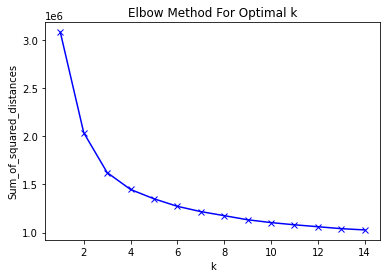

In [20]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


# Hierarchical Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

In [48]:
data3_50=data_50.copy()

In [49]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(data3_50)

AgglomerativeClustering(n_clusters=3)

In [50]:
data3_50['clusters'] = cluster.fit_predict(data3_50)

In [51]:
data3_50

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,clusters
tweet,,,,,,,,,,,,,,,,,,,,,
"Stop twisting stories like that. It's not going to help Bitcoin. He said the tech behind Bitcoin was brilliant (blockchain), but it is way too energy intensive (wasteful). Apperantly, he's not aware of $XRP yet.",-0.182384,-0.245320,-0.006157,-0.629867,0.584033,-0.043222,0.193889,-0.204361,0.320052,0.075735,...,-0.142710,0.017922,0.130797,0.106657,-0.040467,-0.036104,-0.062228,0.117869,-0.457481,2
Byteball now traded on bitsquare.io bitsquare.io bitcoin dag innovation,0.365673,0.202702,-0.231117,-0.644577,-0.014774,0.649974,-0.373173,-0.943101,0.457877,-0.701764,...,0.505753,0.120916,0.639779,0.461023,-0.248836,1.436187,-1.076070,-0.379450,0.209048,0
". has announced the incorporation of Planaria Corp, his Bitcoin development business",0.676836,0.647348,-0.131352,-0.209121,-0.154241,1.427627,-0.518274,-1.396299,0.124085,-0.694730,...,0.250235,0.285347,0.291864,0.273105,-0.375698,0.649467,-1.134319,-0.481337,0.182812,0
Don't forget to join the official TV-TWO Telegram group: // tvrevolution crypto cryptocurrencies bitcoin ethereum blockchain fintech ico TVTWO $TTV $crypto,0.167073,0.398648,-0.231797,-0.688031,0.688092,0.852001,-0.425398,-1.580576,0.511292,-0.631065,...,0.318389,0.059916,0.425415,1.041759,-0.247074,1.009007,-0.762721,-0.546992,0.676401,0
"Toplam 2500 TL Hediye! Şanslı 10 takipçimize 250 TL değerinde BITCOIN hediye ediyoruz! 🎉 - hesabını takip et, -Bu tweeti retweet et ve 2 arkadaşını etiketle! Kazanan takipçilerimiz 12 Mart Cuma günü 14:00’de açıklanacaktır.",0.026886,-0.040083,-0.545751,-0.169660,0.588017,-0.139995,-0.383845,-0.549324,0.104545,-0.287450,...,0.476491,-0.257858,0.077463,0.315363,-0.323012,0.524256,-1.064353,-0.188274,-0.184696,1
". recently interviewed President for his podcast where they discuss gold, bitcoin, real estate, public markets, alternatives, having a healthy relationship with money and more! Important legal disclosure:",0.212153,0.152555,-0.219736,-0.603234,0.727988,0.881664,-0.514253,-1.319087,0.850963,-0.401767,...,0.463535,0.252615,0.633368,0.457347,-0.049929,0.923160,-0.353045,-0.425785,0.454103,0
Formasyon çalışması için destek ve direnç bölgelerini takip edeceğiz. Kırmızı halka 9K$ destek bölgesini ifade eder. Mavi halka 11K direnç bölgesini. Takip edelim. bitcoin,-0.164807,-0.041631,-0.539865,-0.434089,0.360229,-0.092154,-0.392428,-0.196205,-0.100294,-0.258220,...,0.540382,0.157443,0.074903,0.046908,-0.662617,0.716173,-1.397794,-0.408551,-0.525920,1
"the CIO of one of the world's largest asset managers with 7.8 TRILLION of assets under management, just went on TV and told investors bitcoin is a more functional gold 🤯 slowly, and then all at once",0.120341,0.178139,-0.221598,-0.742134,0.913449,0.758497,-0.396579,-1.087566,0.740808,-0.225379,...,0.525413,-0.140383,0.589361,0.358767,0.018772,0.628625,-0.720637,-0.410734,0.309217,0
Best Time to Post on Steemit [Infographic] steem steemit bitcoin marketing socialmedia,0.261857,0.658094,-0.332822,-0.702821,0.374439,1.058574,-0.467658,-1.258029,0.327854,-0.562325,...,0.021499,0.311336,0.435373,0.711762,-0.473041,1.405452,-0.730789,-0.399687,0.332704,0


In [52]:
data3_50 = data3_50[ ['clusters'] + [ col for col in data3_50.columns if col != 'clusters' ] ]

In [53]:
data3_50=data3_50.sort_values(by ='clusters', ascending = 1)
data3_50

,clusters,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
Friend: “Wow man I’m really waiting for Bitcoin to reach $50K! then I’ll sell some and take profits” Me:,0,-0.029426,0.162715,-0.106783,-0.766145,0.655645,0.423046,-0.173961,-0.712572,0.784709,...,-0.601026,0.282919,-0.211560,0.580789,0.171904,0.057235,0.775368,-0.589355,-0.498462,0.129024
"Though CraigisSatoshi and this will be obvious to all in time (it is already to everyone smart), this is now moot. Real Bitcoin BSV is beyond any one person now...it is the worlds top utility platform with its unique in the world massive scaling and Craig did this for sure.",0,0.376993,0.176541,-0.180488,-0.536861,0.727243,0.740629,-0.472052,-1.008952,0.747551,...,-0.471069,0.418637,-0.189035,0.501469,0.340150,0.037394,0.741553,-0.220452,-0.271985,0.380318
Introducing the Zimbabwe Bitcoin Wallet (limited quantities available):,0,0.528981,0.490702,-0.130835,-0.394920,-0.309092,1.144445,-0.595799,-1.499344,-0.082482,...,-0.078642,0.039082,0.477926,0.021559,0.545972,-0.576369,0.899728,-1.320203,-0.703273,0.519412
Bitcoin is BitTorrent for Gold.,0,-0.068148,0.702984,-0.523017,-0.128403,0.220505,1.252392,-0.567731,-0.795327,0.354430,...,-0.127091,0.326081,-0.286433,0.532245,0.095196,-0.240492,0.518014,-0.422347,-0.384925,0.389472
Do you know you can earn free Bitcoin on your phone by clicking links in telegram app below⤵️ List of coins you can earn:↙️ 365daysofgiveaways DAY-8 $dgb $bnb $xrp $doge $crypto mon 2 200 $tzc thesatoshistore,0,0.248543,0.544849,-0.434357,-0.408526,0.418750,0.861391,-0.369828,-1.166692,0.818067,...,-0.280172,0.502749,-0.337260,0.071802,0.429241,-0.096646,0.688504,-0.937379,-0.706462,0.620386
thanks to for having me on her show to talk bitcoin! we officially changed my name to meltem “blockchain” demirors ⛓,0,0.534442,1.350536,-0.463502,-0.614540,0.780883,0.743683,-0.463409,-1.749881,1.717401,...,-0.582010,0.308541,0.082507,0.402570,0.296644,0.519737,1.132540,-0.337604,-0.356696,0.966693
'Smart Contracts' Are the Future of Blockchain FinTech Bitcoin,0,0.167686,0.279942,-0.316068,-0.514783,0.175917,1.343785,-0.481054,-1.202265,0.792518,...,-0.178433,0.479583,-0.165517,0.646966,0.467131,-0.049699,1.042527,-0.200508,-0.282748,0.391433
"Blockstream's and will be at the Lightning Hackday in Munich this weekend (June 1-2). Be there to catch Jonas speaking about nix-bitcoin, and Alekos live-coding a clightning plugin! ⚡️⛓️📝🌊 LightningHackdayMUC",0,0.321559,0.526463,-0.203456,-0.518111,0.432880,0.768056,-0.648735,-1.562469,0.737366,...,-0.411667,0.138407,0.238878,0.395491,0.699951,-0.218877,1.017492,-1.242789,-0.375126,0.630096
"❗️ $BTC CHAUPDATE❗️08/15/18 Quick bitcoin update. After future expiration, $BTC fell once again. I believe we are still heading lower to the 5400 range. We may see some upward momentum to take us to the 6500 range before we head lower. Trade Safu",0,-0.209940,-0.063281,-0.121989,-0.488411,0.707987,0.280541,-0.154612,-0.306154,0.122315,...,0.009038,0.371558,-0.068607,0.497539,0.359925,-0.263971,0.107018,-0.475183,-0.351431,0.067720


In [54]:
data4_50=data_50.copy()

In [55]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit(data3_50)

AgglomerativeClustering(n_clusters=5)

In [56]:
data4_50['clusters'] = cluster.fit_predict(data4_50)

In [57]:
data4_50 = data4_50[ ['clusters'] + [ col for col in data4_50.columns if col != 'clusters' ] ]

In [58]:
data4_50=data4_50.sort_values(by ='clusters', ascending = 1)
data4_50

,clusters,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
tweet,,,,,,,,,,,,,,,,,,,,,
Google Trends showing a new ATH in Bitcoin search interest through October 2017. Megabull not over yet Bitcoin megabull $BTCUSD $BTC,0,0.428600,0.562014,-0.387312,-0.640639,0.484953,1.031018,-0.488027,-1.493578,0.550497,...,-0.320581,0.431508,-0.042953,0.252489,0.599296,0.104459,1.149202,-1.086245,-0.541621,0.631120
'Smart Contracts' Are the Future of Blockchain FinTech Bitcoin,0,0.167686,0.279942,-0.316068,-0.514783,0.175917,1.343785,-0.481054,-1.202265,0.792518,...,-0.178433,0.479583,-0.165517,0.646966,0.467131,-0.049699,1.042527,-0.200508,-0.282748,0.391433
Do you know you can earn free Bitcoin on your phone by clicking links in telegram app below⤵️ List of coins you can earn:↙️ 365daysofgiveaways DAY-8 $dgb $bnb $xrp $doge $crypto mon 2 200 $tzc thesatoshistore,0,0.248543,0.544849,-0.434357,-0.408526,0.418750,0.861391,-0.369828,-1.166692,0.818067,...,-0.280172,0.502749,-0.337260,0.071802,0.429241,-0.096646,0.688504,-0.937379,-0.706462,0.620386
Bitcoin is BitTorrent for Gold.,0,-0.068148,0.702984,-0.523017,-0.128403,0.220505,1.252392,-0.567731,-0.795327,0.354430,...,-0.127091,0.326081,-0.286433,0.532245,0.095196,-0.240492,0.518014,-0.422347,-0.384925,0.389472
Introducing the Zimbabwe Bitcoin Wallet (limited quantities available):,0,0.528981,0.490702,-0.130835,-0.394920,-0.309092,1.144445,-0.595799,-1.499344,-0.082482,...,-0.078642,0.039082,0.477926,0.021559,0.545972,-0.576369,0.899728,-1.320203,-0.703273,0.519412
"Blockstream's and will be at the Lightning Hackday in Munich this weekend (June 1-2). Be there to catch Jonas speaking about nix-bitcoin, and Alekos live-coding a clightning plugin! ⚡️⛓️📝🌊 LightningHackdayMUC",0,0.321559,0.526463,-0.203456,-0.518111,0.432880,0.768056,-0.648735,-1.562469,0.737366,...,-0.411667,0.138407,0.238878,0.395491,0.699951,-0.218877,1.017492,-1.242789,-0.375126,0.630096
Nasdaq to Use Bitcoin-style Blockchain to Record Shareholder Votes,0,0.116182,0.248704,-0.277544,-0.412976,0.076388,0.878301,-0.679041,-1.080242,0.252228,...,-0.181965,0.197302,0.375196,0.290347,0.500210,-0.495224,0.689003,-0.667027,-0.297543,0.472846
"Go ""Deeper In The Mines"" with VoskCoin as we tour the biggest and craziest Bitcoin cryptocurrency mining farms from around the world! Watch the full playlist right here on the VoskCoin YouTube channel - bitcoin VoskCoin",0,0.233264,0.419010,-0.407058,-0.619880,0.189598,0.603623,-0.548420,-1.280966,0.576190,...,-0.443314,0.155889,0.236036,0.167905,0.311878,0.145760,1.344402,-0.787829,-0.567846,0.563066
TuneToken Official Reddit just went live. Follow along our latest updates &amp; news. reddit crypto tunetoken bitcoin ethereum blockchain,0,0.101277,-0.119245,-0.341300,-0.173439,0.230422,0.564278,-0.455529,-1.357091,-0.014656,...,-0.364207,0.308829,0.165491,0.516224,0.358330,-0.242853,1.183712,-1.665497,-0.540780,0.555591


# T-SNE

In [67]:
from sklearn.manifold import TSNE

In [68]:
model = TSNE(n_components=2)

tsne_data=model.fit_transform(data)

In [69]:
tsne_data

array([[  2.6672895,  10.361459 ],
       [  8.783342 , -24.940584 ],
       [ -2.8282115, -26.885954 ],
       ...,
       [ 25.774702 ,   3.8769836],
       [  8.274561 , -32.43477  ],
       [  9.159656 , -33.065025 ]], dtype=float32)

In [70]:
tsne_df_scale = pd.DataFrame(tsne_data, columns=['tsne1', 'tsne2'])


In [71]:
kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)

In [72]:
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)


/Users/huizhihan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


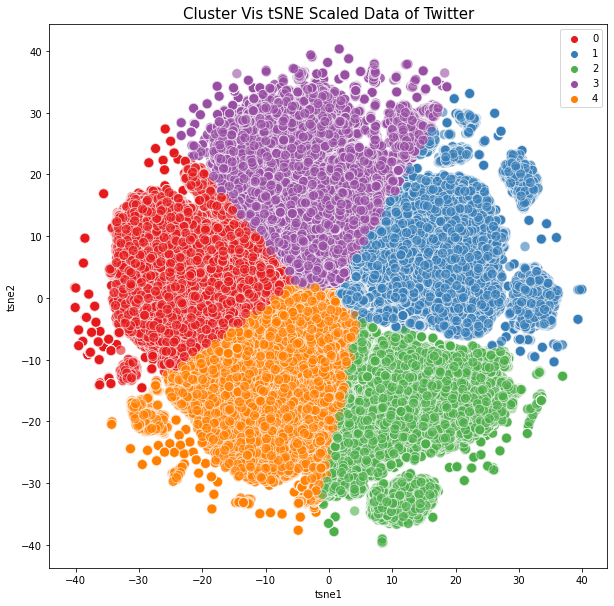

In [75]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data of Twitter', fontsize=15)
plt.legend()
plt.show()
